In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definição do Problema

Você é dono de um shopping e deseja definir grupos de clientes para que você possa direcionar suas estratégias de marketing.

In [2]:
df = pd.read_csv('datasets/Mall_Customers.csv')
df

,customer_id,gender,age,annual_income_k$,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.describe()

,customer_id,age,annual_income_k$,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       200 non-null    int64 
 1   gender            200 non-null    object
 2   age               200 non-null    int64 
 3   annual_income_k$  200 non-null    int64 
 4   spending_score    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
len(df.customer_id.unique())

200

Inicialmente, para dividirmos em grupos, o ID do cliente não é uma informação útil, por isso podemos deletar essa coluna do dataset. Vamos iniciar a descrição das outras colunas.

In [6]:
df = df.drop(columns=['customer_id'])

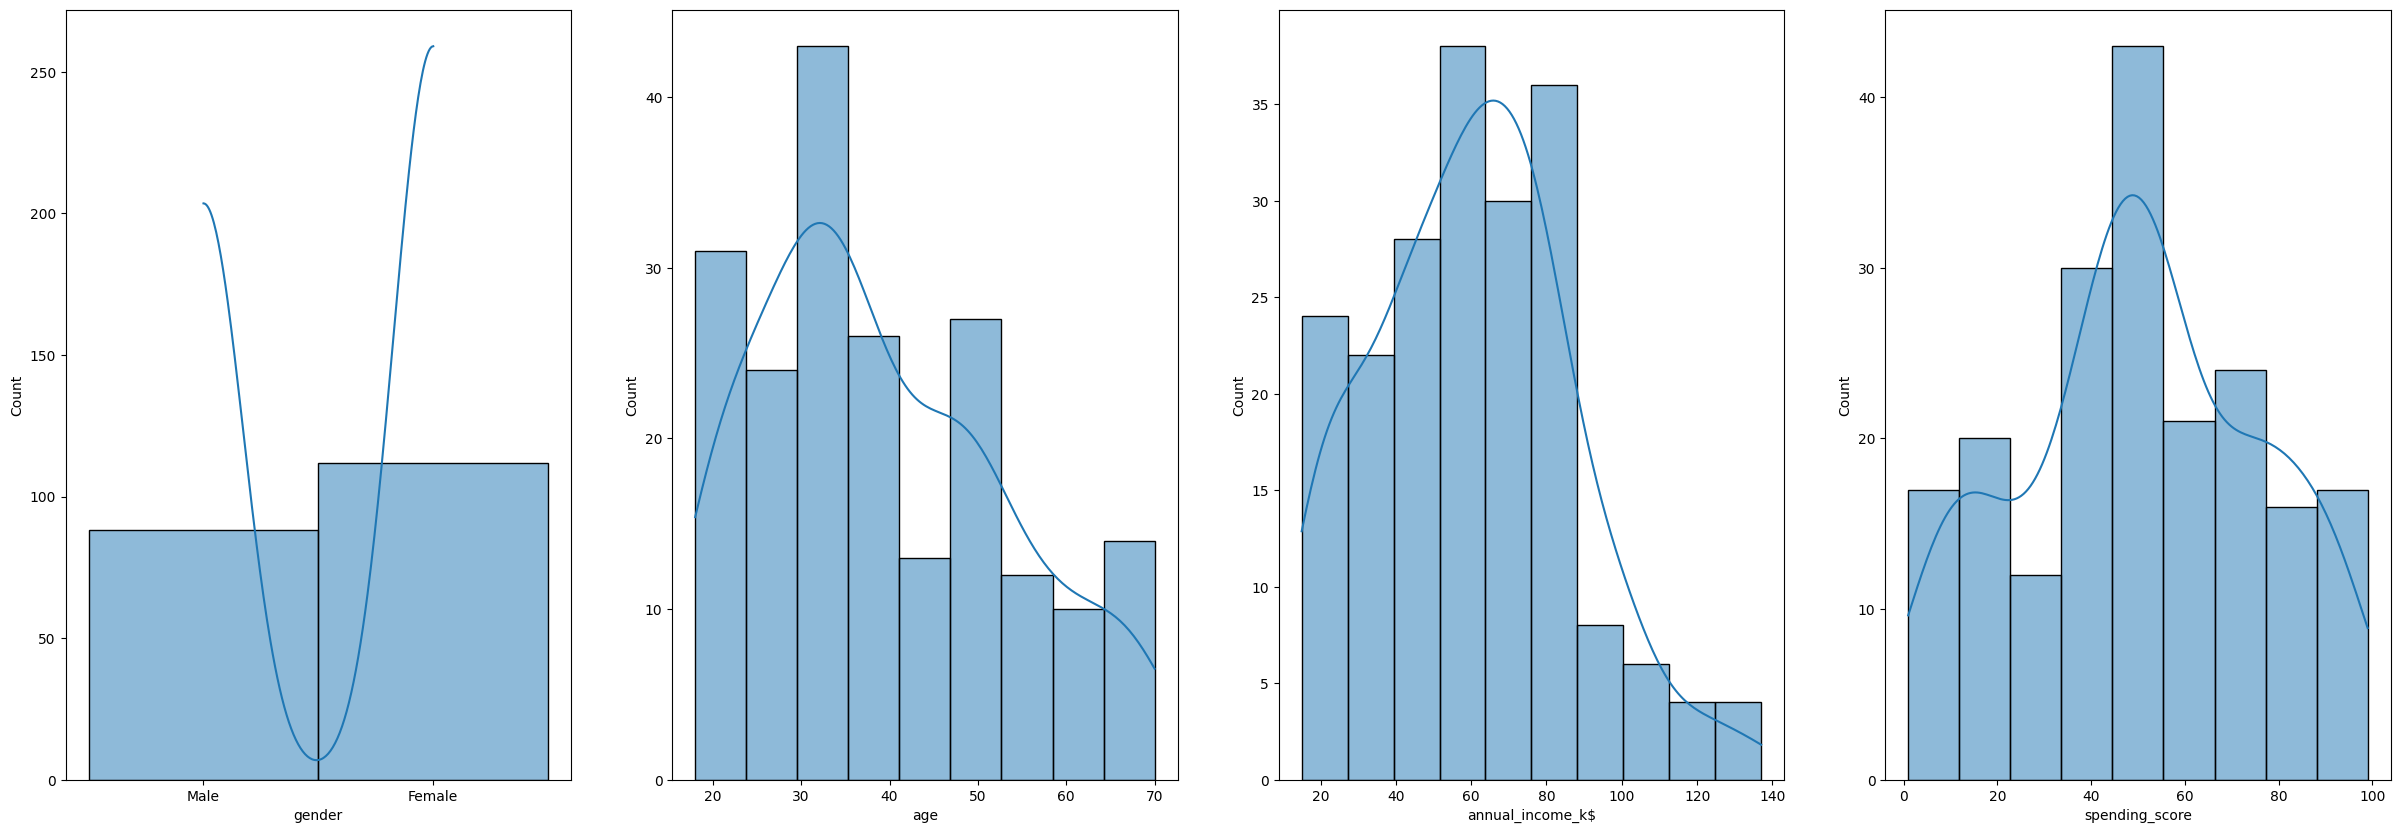

In [7]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(30, 10))

for i, c in enumerate(df.columns):
    sns.histplot(df[c], ax=axs[i], kde=True)

A decisão sobre quais colunas iremos considerar para realizar a segmentação dos clientes, depende do objetivo final. Por exemplo, queremos realizar uma campanha, com foco no público de maior renda e disposição para gastar, independente do sexo e idade desses clientes? Se sim devemos apenas incluir as duas últimas colunas no nosso cluster. Vamos analisar essa hipótese

<AxesSubplot:xlabel='annual_income_k$', ylabel='spending_score'>

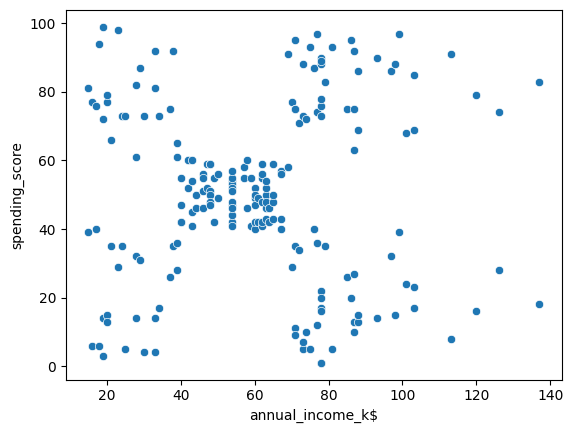

In [8]:
sns.scatterplot(
    x=df['annual_income_k$'],
    y=df['spending_score']
)

Embora essas duas features apresentem intervalos de dados similares, uma forma de garantir que uma feature não vai ter mais impacto do que a outra no modelo, é aplicando uma padronização dos dados.

In [9]:
from sklearn.preprocessing import StandardScaler

zscore = StandardScaler()
df_std = zscore.fit_transform(df[['annual_income_k$', 'spending_score']])

Devido a simplicidade desse problema (apenas duas variáveis), a imagem acima já indica que 5 seria um bom número de clusters. No entando uma forma bastante utilizada na literatura é testar vários números de clusters e analisar a inércia (soma da distância dos pontos aos centros de seus clusters)

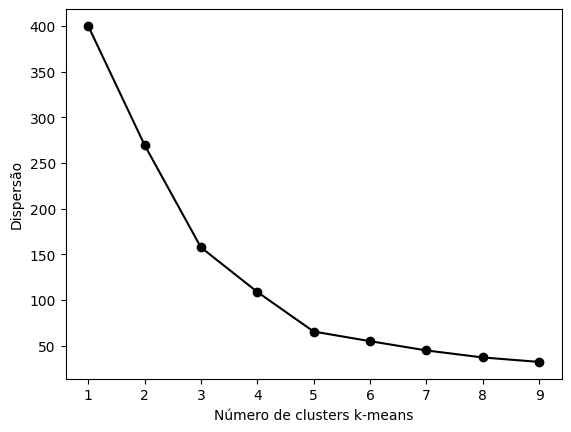

In [10]:
from sklearn.cluster import KMeans

ks = range(1, 10)

inertias = []
for k in ks:
    model = KMeans(n_clusters = k, n_init=10).fit(df_std)
    
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('Número de clusters k-means')
plt.ylabel('Dispersão')
plt.xticks(ks)
plt.show()

De acordo com o método de Elbow, 5 é um bom número de clusters. Esse já era um valor que conseguimos constatar pela análise visual.

In [11]:
model = KMeans(n_clusters = 5, n_init=10).fit(df_std)
df['cluster'] = model.labels_

<AxesSubplot:xlabel='annual_income_k$', ylabel='spending_score'>

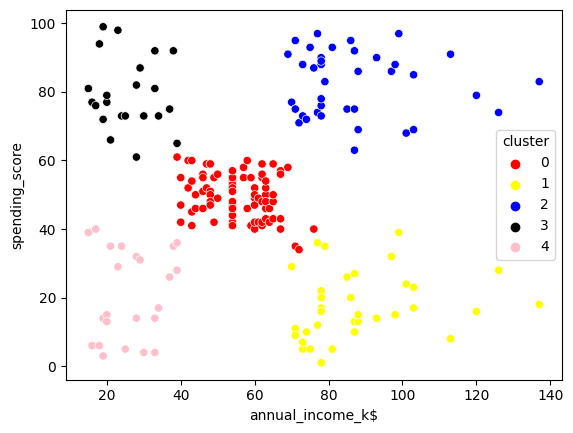

In [12]:
sns.scatterplot(
    data=df,
    x='annual_income_k$',
    y='spending_score',
    hue='cluster',
    palette=['red', 'yellow', 'blue', 'black', 'pink']
)

### Qual a relação dos grupos com o sexo dos clientes?

In [13]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='count'>

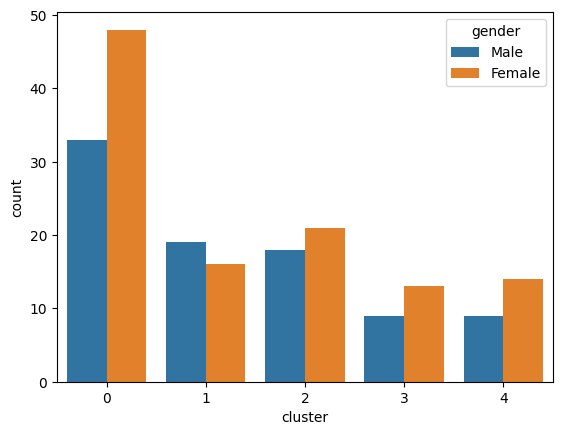

In [14]:
sns.countplot(
    data=df,
    x='cluster',
    hue='gender'
)

Como é da natureza da base, as mulheres são a maioria em quase todos os clusters, com exceção do cluster 1, que é aquele público com renda mais alta e baixo gasto.

### Qual a relação dos grupos com a idade dos clientes?

<AxesSubplot:xlabel='age_group', ylabel='count'>

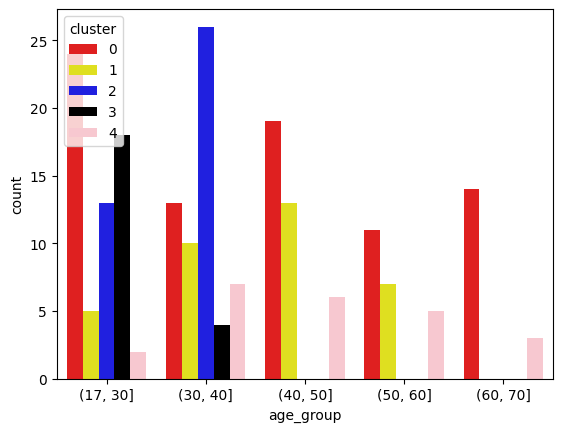

In [15]:
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 40, 50, 60, 70])

sns.countplot(
    data=df,
    x='age_group',
    hue='cluster',
    palette=['red', 'yellow', 'blue', 'black', 'pink']
)

Observamos que o grupo que possui renda alta e gasto alto é predominante se concentra na faixa de 30 a 40 anos. O público que gasta muito e ganha pouco, por outro lado, predomina na faixa de 17 a 30 anos.